In [6]:
using Pkg
Pkg.add("JuMP")
Pkg.add("PowerModels")
Pkg.add("Ipopt")
Pkg.add("GLPK")
Pkg.add("DataFrames")

   Resolving package versions...
  No Changes to `C:\Users\mansi\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\mansi\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\mansi\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\mansi\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\mansi\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\mansi\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\mansi\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\mansi\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\mansi\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\mansi\.julia\environments\v1.9\Manifest.toml`


In [7]:

# Pin StatPlots to a compatible version
Pkg.add("StatsPlots")

   Resolving package versions...
  No Changes to `C:\Users\mansi\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\mansi\.julia\environments\v1.9\Manifest.toml`


In [23]:
include("C:/Users/mansi/Dropbox/6.7201_optimization_methods/Project/ac-ED.jl")

[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 32 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 32 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 29 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 29 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 1 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 1 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 54 from -360.0 to -60.0 deg.


In [9]:
#Analyze ED Results
using Plots
using DataFrames
# Extract solution values
pg_values = value.(pg_ed)

# Extract indices from DenseAxisArray
gen_indices = collect(axes(pg_values)[1]);

PG = zeros(length(gen_indices));
Pmax = zeros(length(gen_indices));
Cost = zeros(length(gen_indices));

for i = 1:length(gen_indices)
PG[gen_indices[i]]  = pg_values[gen_indices[i]]*ref[:baseMVA]
Pmax[gen_indices[i]] = ref[:gen][gen_indices[i]]["pmax"]*ref[:baseMVA]
Cost[gen_indices[i]] = ref[:gen][gen_indices[i]]["cost"][2]/ref[:baseMVA]
end


In [10]:
# Create a DataFrame
df = DataFrame(Active_Power = PG , Maximum_Capacity = Pmax, Marginal_Cost = Cost)
# Display the DataFrame
display(df)

Row,Active_Power,Maximum_Capacity,Marginal_Cost
,Float64,Float64,Float64
1,139.461,575.88,20.0
2,81.9313,100.0,40.0
3,43.2773,140.0,20.0
4,81.9313,100.0,40.0
5,486.869,550.0,20.0
6,81.9313,100.0,40.0
7,335.399,410.0,20.0


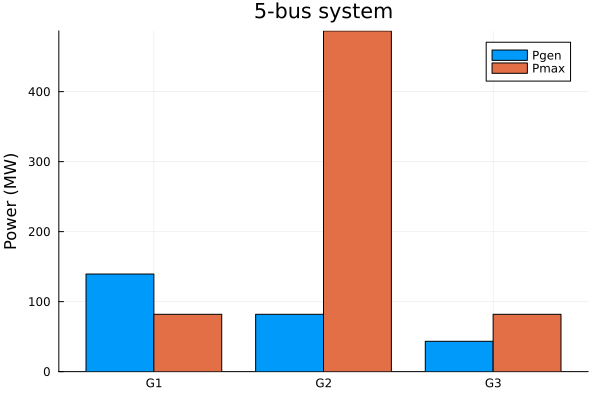

In [11]:
Power = [PG Pmax]
Gen = repeat(["Pgen", "Pmax"], inner = 3)
nam = repeat("G" .* string.(1:3), outer = 2)

using Plots
using StatsPlots
# Create the dual bar chart
groupedbar(nam, Power, group = Gen, ylabel = "Power (MW)", title = "5-bus system")


In [24]:
include("C:/Users/mansi/Dropbox/6.7201_optimization_methods/Project/ac-OPF.jl")

[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 32 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 32 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 29 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 29 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 1 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 1 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 54 from -360.0 to -60.0 deg.


In [13]:

# Extract solution values
vm_values = value.(vm)
va_values = value.(va)
pg_values = value.(pg)
p_values = value.(p)
q_values = value.(q)
p_dc_values = value.(p_dc)


# Extract indices from DenseAxisArray
bus_indices = collect(axes(vm_values)[1])
gen_indices = collect(axes(pg_values)[1]);
branch_indices = collect(axes(p_values)[1])

VM = zeros(length(bus_indices));
for i = 1:length(bus_indices)
VM[bus_indices[i]]  = vm_values[bus_indices[i]]
end
    
VA = zeros(length(bus_indices));
for i = 1:length(bus_indices)
VA[bus_indices[i]]  = va_values[bus_indices[i]]
end

PG_opf = zeros(length(gen_indices));
Cost_opf = zeros(length(gen_indices));
for i = 1:length(gen_indices)
PG_opf[gen_indices[i]]  = pg_values[gen_indices[i]]*ref[:baseMVA]
Pmax[gen_indices[i]] = ref[:gen][gen_indices[i]]["pmax"]*ref[:baseMVA]
Cost_opf[gen_indices[i]] = ref[:gen][gen_indices[i]]["cost"][2]/ref[:baseMVA]
end

PB = zeros(length(branch_indices));
for i = 1:length(branch_indices)
PB[i]  = p_values[branch_indices[i]]*ref[:baseMVA]
end

QB = zeros(length(branch_indices));
for i = 1:length(branch_indices)
QB[i]  = q_values[branch_indices[i]]*ref[:baseMVA]
end

In [14]:
# Create a DataFrame
df = DataFrame(Active_Power = PG_opf)
# Display the DataFrame
display(df)

Row,Active_Power
,Float64
1,142.626
2,87.791
3,45.0709
4,72.8626
5,459.805
6,97.6345
7,361.522


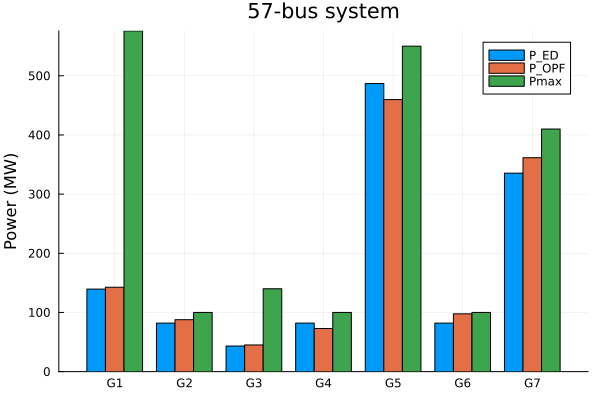

In [22]:
Power = [PG PG_opf Pmax]
Gen = repeat(["P_ED","P_OPF", "Pmax"], inner = 7)
nam = repeat("G" .* string.(1:7), outer = 3)

using Plots

# Create the dual bar chart
groupedbar(nam, Power, group = Gen, ylabel = "Power (MW)", title = "57-bus system")


In [222]:
# Create a DataFrame
df = DataFrame(branch = branch_indices,Active_Power_flow = PB, )
# Display the DataFrame
display(df)

Row,branch,Active_Power_flow
,Tuple…,Float64
1,"(5, 2, 4)",40.8339
2,"(8, 3, 5)",24.1917
3,"(1, 1, 2)",20.6757
4,"(6, 2, 5)",23.2798
5,"(11, 5, 6)",-0.979885
6,"(9, 3, 6)",49.0774
7,"(3, 1, 5)",37.6531
8,"(7, 2, 6)",33.9634
9,"(4, 2, 3)",7.55853


In [84]:
cost = zeros(7, 1001)
pmax_list = []

for g = 1:length(gen_indices)
    i = 1  # Start indexing from 1
    Pmax_g = Pmax[g]
    for p in 0:Pmax_g/1000:Pmax_g
        push!(pmax_list, p)
        cost[g, i] = ref[:gen][g]["cost"][1] * p^2/(ref[:baseMVA])^2 + ref[:gen][g]["cost"][2] * p/ref[:baseMVA] + ref[:gen][g]["cost"][3]
        i += 1
    end
end

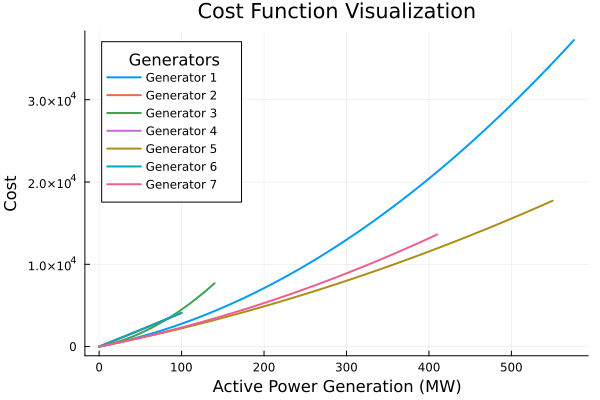

In [87]:

# Create a plot for each generator with legends
plot(pmax_list[1:1001], cost[1,:], label="Generator 1", linewidth=2)
plot!(pmax_list[1002:2002], cost[2,:], label="Generator 2", linewidth=2)
plot!(pmax_list[2003:3003], cost[3,:], label="Generator 3", linewidth=2)
plot!(pmax_list[3004:4004], cost[4,:], label="Generator 4", linewidth=2)
plot!(pmax_list[4005:5005], cost[5,:], label="Generator 5", linewidth=2)
plot!(pmax_list[5006:6006], cost[6,:], label="Generator 6", linewidth=2)
plot!(pmax_list[6007:7007], cost[7,:], label="Generator 7", linewidth=2)

# Add a legend, labels, and title
plot!(legend_title="Generators", xlabel="Active Power Generation (MW)", ylabel="Cost", title="Cost Function Visualization")
